In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from functools import partial

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split, WeightedRandomSampler
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torchvision.models as models

import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as T
from tqdm import tqdm

In [3]:
USE_GPU = True

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cuda


In [4]:
class VehicleDataset(Dataset):
    
    def __init__(self, path, transform=None):
        data = np.load(path)
        self.images = data["images"]
        self.labels = data["labels"]
        self.transform = transform
        print("Images shape:", self.images.shape)
        print("Labels shape:", self.labels.shape)
        self.__combinelabels__()

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)
        image_disp = image
        label = torch.tensor(label, dtype=torch.long)
        # mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        # std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
        # image = (image - mean) / std

        # if self.transform:
        #     image = self.transform(image)
        
        return image, label

    # def with_transform(self, transform):
    #     new_ds = VehicleDataset.__new__(VehicleDataset)
    #     new_ds.images = self.images
    #     new_ds.labels = self.labels
    #     new_ds.transform = transform
    #     return new_ds
        
    def __combinelabels__(self):
        for idx, label in enumerate(self.labels):
            if label == 1:
                self.labels[idx] = 1
            if label >= 2 and label <= 7:
                self.labels[idx] = 2
            if label >= 8 and label <= 11:
                self.labels[idx] = 3
            if label >= 12 and label <= 25:
                self.labels[idx] = 4
            if label >= 26 and label <= 38:
               self.labels[idx] = 5
            if label >= 39 and label <= 44:
                self.labels[idx] = 6
            if label >= 45 and label <= 50:
                self.labels[idx] = 7
            if label >= 51 and label <= 53:
                self.labels[idx] = 8
            if label >= 54 and label <= 75:
                self.labels[idx] = 9
            if label >= 76 and label <= 81:
                self.labels[idx] = 10
            if label == 82:
                self.labels[idx] = 11
            if label >= 83 and label <= 97:
                self.labels[idx] = 12
            if label == 98:
                self.labels[idx] = 13
            if label >= 99 and label <= 100:
                self.labels[idx] = 14
            if label >= 101 and label <= 104:
                self.labels[idx] = 15
            if label == 105:
                self.labels[idx] = 16
            if label >= 106 and label <= 117:
                self.labels[idx] = 17
            if label >= 118 and label <= 122:
                self.labels[idx] = 18
            if label == 123:
                self.labels[idx] = 19
            if label >= 124 and label <= 125:
                self.labels[idx] = 20
            if label >= 126 and label <= 129:
                self.labels[idx] = 21
            if label >= 130 and label <= 140:
                self.labels[idx] = 22
            if label >= 141 and label <= 142:
                self.labels[idx] = 23
            if label == 143:
                self.labels[idx] = 24
            if label == 144:
                self.labels[idx] = 25
            if label >= 145 and label <= 149:
                self.labels[idx] = 26
            if label >= 150 and label <= 153:
                self.labels[idx] = 27
            if label >= 154 and label <= 155:
                self.labels[idx] = 28
            if label == 156:
                self.labels[idx] = 29
            if label == 157:
                self.labels[idx] = 30
            if label == 158:
                self.labels[idx] = 31
            if label == 159:
                self.labels[idx] = 32
            if label == 160:
                self.labels[idx] = 33
            if label >= 161 and label <= 166:
                self.labels[idx] = 34
            if label == 167:
                self.labels[idx] = 35
            if label >= 168 and label <= 171:
                self.labels[idx] = 36
            if label == 172:
                self.labels[idx] = 37
            if label == 173:
                self.labels[idx] = 38
            if label == 174:
                self.labels[idx] = 39
            if label >= 175 and label <= 177:
                self.labels[idx] = 40
            if label == 178:
                self.labels[idx] = 41
            if label >= 179 and label <= 180:
                self.labels[idx] = 42
            if label >= 181 and label <= 184:
                self.labels[idx] = 43
            if label == 185:
                self.labels[idx] = 44
            if label >= 186 and label <= 189:
                self.labels[idx] = 45
            if label >= 190 and label <= 192:
                self.labels[idx] = 46
            if label >= 193 and label <= 195:
                self.labels[idx] = 47
            if label == 196:
                self.labels[idx] = 48

In [5]:
dataset = VehicleDataset('../dataset/stanford_cars_dataset.npz')

batch_size = 32
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = int(len(dataset) - train_size - val_size)

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
# train_indices, val_indices, test_indices = random_split(
#     range(len(dataset)), [train_size, val_size, test_size],
#     generator=torch.Generator().manual_seed(42)
# )

# train_dataset = torch.utils.data.Subset(dataset.with_transform(None), train_indices)
# val_dataset   = torch.utils.data.Subset(dataset.with_transform(None), val_indices)
# test_dataset  = torch.utils.data.Subset(dataset.with_transform(None), test_indices)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Images shape: (8144, 112, 112, 3)
Labels shape: (8144, 1)


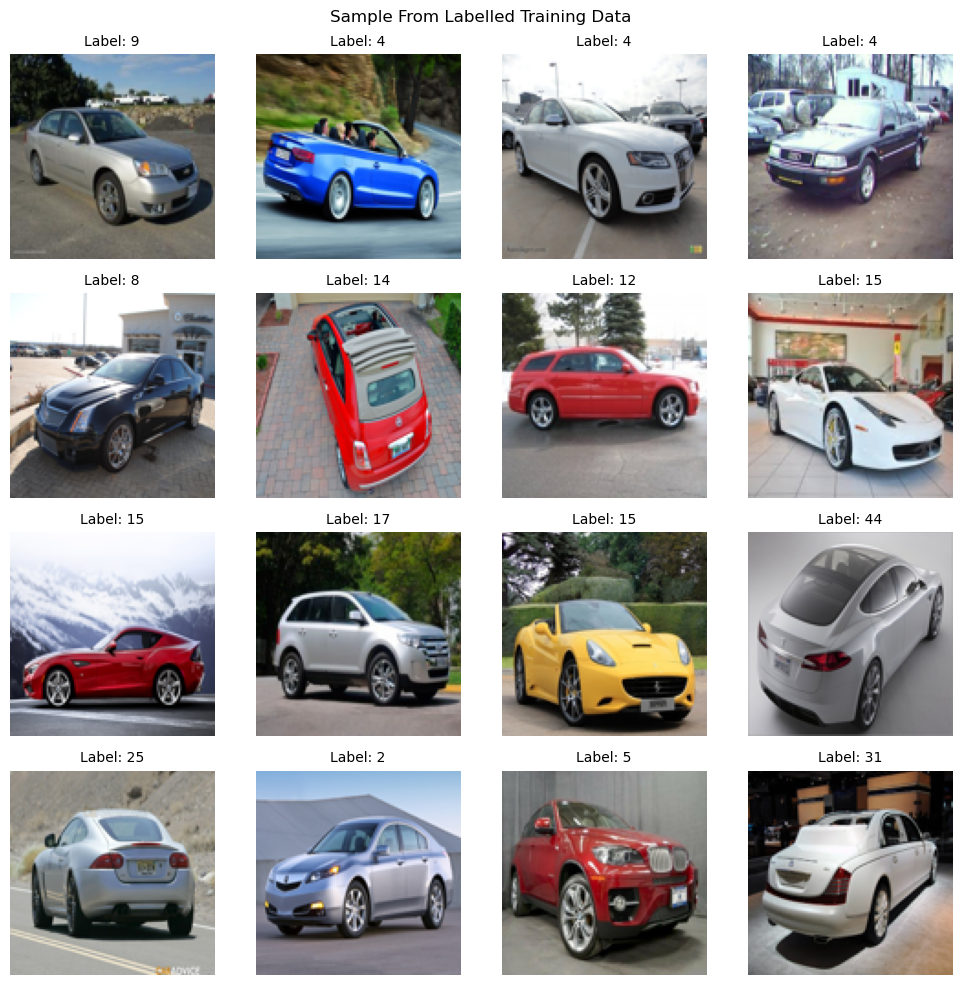

In [6]:
for images, labels in train_loader:
    break 

# Create figure
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.flatten()

for i in range(16):
    img = images[i].permute(1, 2, 0).numpy() 
    axes[i].imshow(img)
    axes[i].set_title(f"Label: {labels[i].item()}", fontsize=10)
    axes[i].axis("off")

plt.suptitle("Sample From Labelled Training Data")
plt.tight_layout(rect=[0, 0, 1, 1]) 
plt.show()

In [7]:
class SEBlock(nn.Module):
    def __init__(self, in_channels, reduction=4):
        super().__init__()
        self.fc1 = nn.Conv2d(in_channels, in_channels // reduction, 1)
        self.fc2 = nn.Conv2d(in_channels // reduction, in_channels, 1)
    
    def forward(self, x):
        scale = F.adaptive_avg_pool2d(x, 1)
        scale = F.relu(self.fc1(scale))
        scale = torch.sigmoid(self.fc2(scale))
        return x * scale

In [8]:
class MBConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, expansion_factor, stride, kernel_size, se_ratio=0.25, drop_connect_rate=0.):
        super().__init__()
        self.drop_connect_rate = drop_connect_rate
        mid_channels = in_channels * expansion_factor
        self.use_residual = (stride == 1 and in_channels == out_channels)

        # expansion
        self.expand_conv = nn.Conv2d(in_channels, mid_channels, 1, bias=False) if expansion_factor != 1 else nn.Identity()
        self.expand_bn = nn.BatchNorm2d(mid_channels) if expansion_factor != 1 else nn.Identity()
        
        # dw conv
        self.dw_conv = nn.Conv2d(mid_channels, mid_channels, kernel_size, stride, kernel_size // 2, groups=mid_channels, bias=False)
        self.dw_bn = nn.BatchNorm2d(mid_channels)

        # SE 
        self.se = SEBlock(mid_channels, reduction=int(1/se_ratio)) if se_ratio > 0 else nn.Identity()

        # projection
        self.project_conv = nn.Conv2d(mid_channels, out_channels, 1, bias=False)
        self.project_bn = nn.BatchNorm2d(out_channels)
        
        self.activation = nn.SiLU()

    def drop_connect(self, x, drop_prob):
        if not self.training or drop_prob == 0.:
            return x
        keep_prob = 1 - drop_prob
        batch_size = x.shape[0]
        random_tensor = keep_prob + torch.rand(batch_size, 1, 1, 1, device=x.device)
        binary_mask = torch.floor(random_tensor)
        return x / keep_prob * binary_mask

    def forward(self, x):
        identity = x

        # Expansion
        x = self.expand_conv(x)
        x = self.expand_bn(x)
        x = self.activation(x)

        # dw_conv
        x = self.dw_conv(x)
        x = self.dw_bn(x)
        x = self.activation(x)

        # SE
        x = self.se(x)

        # Projection
        x = self.project_conv(x)
        x = self.project_bn(x)

        # Residual + Drop connect
        if self.use_residual:
            if self.drop_connect_rate > 0:
                x = self.drop_connect(x, self.drop_connect_rate)
            x = x + identity
        return x

In [18]:
b0_blocks_args = [
    (1, 16, 1, 3, 1),
    (6, 24, 2, 3, 2),
    (6, 40, 1, 5, 2), # num blocks 2->1
    (6, 80, 2, 3, 2), # num blocks 3->2
    (6, 112, 2, 5, 1), # num blocks 3->2
    (6, 192, 2, 5, 2), # num blocks 4->2
    (6, 320, 1, 3, 1),
]

class EfficientNetB0(nn.Module):
    def __init__(self, num_classes=48, drop_connect_rate=0.3):
        super().__init__()
        # Stem
        self.stem_conv = nn.Conv2d(3, 32, 3, stride=2, padding=1, bias=False)
        self.stem_bn = nn.BatchNorm2d(32)
        self.activation = nn.SiLU()

        # Build blocks
        self.blocks = nn.ModuleList([])
        total_blocks = sum(args[2] for args in b0_blocks_args)
        block_id = 0

        in_channels = 32
        for expansion, out_channels, num_blocks, kernel_size, stride in b0_blocks_args:
            for i in range(num_blocks):
                stride_to_use = stride if i == 0 else 1
                drop_rate = drop_connect_rate * block_id / total_blocks
                block = MBConvBlock(in_channels, out_channels, expansion, stride_to_use, kernel_size, drop_connect_rate=drop_rate)
                self.blocks.append(block)
                in_channels = out_channels
                block_id += 1

        # Head
        self.head_conv = nn.Conv2d(in_channels, 1280, 1, bias=False)
        self.head_bn = nn.BatchNorm2d(1280)

        # Pool and classifier
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.dropout = nn.Dropout(0.7)
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.stem_conv(x)
        x = self.stem_bn(x)
        x = self.activation(x)

        for block in self.blocks:
            x = block(x)

        x = self.head_conv(x)
        x = self.head_bn(x)
        x = self.activation(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

In [ ]:
import torch
from collections import OrderedDict
from torchvision.models import efficientnet_b0

# Load pretrained torchvision weights
tv_model = efficientnet_b0(weights='IMAGENET1K_V1')
tv_sd = tv_model.state_dict()

custom_model = EfficientNetB0()
custom_sd = custom_model.state_dict()

mapped_sd = OrderedDict()
assigned_count = 0
missing_keys = []

def try_assign(target_key, source_key):
    global assigned_count
    if source_key in tv_sd:
        mapped_sd[target_key] = tv_sd[source_key]
        assigned_count += 1
    else:
        missing_keys.append((target_key, source_key))

block_id = 0
tv_block_idx = 1

while block_id < 16 and any(k.startswith(f'features.{tv_block_idx}') for k in tv_sd):
    tv_base = f'features.{tv_block_idx}'
    if any(k.startswith(f'{tv_base}.0') for k in tv_sd):
        tv_base = f'{tv_base}.0'

    prefix = f'blocks.{block_id}'

    # Expand conv + BN
    try_assign(f'{prefix}.expand_conv.weight', f'{tv_base}.expand_conv.weight')
    for suffix in ['weight', 'bias', 'running_mean', 'running_var', 'num_batches_tracked']:
        try_assign(f'{prefix}.expand_bn.{suffix}', f'{tv_base}.expand_bn.{suffix}')

    # Depthwise conv + BN
    try_assign(f'{prefix}.dw_conv.weight', f'{tv_base}.depthwise_conv.weight')
    for suffix in ['weight', 'bias', 'running_mean', 'running_var', 'num_batches_tracked']:
        try_assign(f'{prefix}.dw_bn.{suffix}', f'{tv_base}.bn1.{suffix}')

    # SE block
    try_assign(f'{prefix}.se.fc1.weight', f'{tv_base}.se.reduce.weight')
    try_assign(f'{prefix}.se.fc1.bias', f'{tv_base}.se.reduce.bias')
    try_assign(f'{prefix}.se.fc2.weight', f'{tv_base}.se.expand.weight')
    try_assign(f'{prefix}.se.fc2.bias', f'{tv_base}.se.expand.bias')

    # Project conv + BN
    try_assign(f'{prefix}.project_conv.weight', f'{tv_base}.project_conv.weight')
    for suffix in ['weight', 'bias', 'running_mean', 'running_var', 'num_batches_tracked']:
        try_assign(f'{prefix}.project_bn.{suffix}', f'{tv_base}.bn2.{suffix}')

    block_id += 1
    tv_block_idx += 1

custom_model.load_state_dict(mapped_sd, strict=False)

In [37]:
def train_model(model):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    best_val_acc = 0.0
    patience_counter = 0
    max_patience = 4

    num_epochs = 30
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in tqdm(train_loader):
            images = images.to(device)
            labels = labels[:, 0].to(device) - 1

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / total
        epoch_acc = correct / total
        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels[:, 0].to(device) - 1
                outputs = model(images)
                preds = outputs.argmax(dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        val_acc = correct / total
        print(f"Validation Acc: {val_acc:.4f}")

        # Early stopping
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
            torch.save(model.state_dict(), "best_model.pth")
        else:
            patience_counter += 1
            if patience_counter >= max_patience:
                print("Early stopping.")
                break

        scheduler.step()

    print(f"\nBest Validation Accuracy: {best_val_acc:.4f}")

In [38]:
efficientnet = EfficientNetB0()
train_model(efficientnet.to(device))

100%|██████████| 179/179 [00:09<00:00, 18.74it/s]


Epoch 1/30 - Loss: 3.5987 - Accuracy: 0.0835
Validation Acc: 0.1057


100%|██████████| 179/179 [00:08<00:00, 20.09it/s]


Epoch 2/30 - Loss: 3.3952 - Accuracy: 0.1147
Validation Acc: 0.1179


100%|██████████| 179/179 [00:08<00:00, 21.03it/s]


Epoch 3/30 - Loss: 3.3401 - Accuracy: 0.1175
Validation Acc: 0.1114


100%|██████████| 179/179 [00:08<00:00, 21.44it/s]


Epoch 4/30 - Loss: 3.2691 - Accuracy: 0.1353
Validation Acc: 0.1229


100%|██████████| 179/179 [00:09<00:00, 19.00it/s]


Epoch 5/30 - Loss: 3.1495 - Accuracy: 0.1726
Validation Acc: 0.1179


100%|██████████| 179/179 [00:09<00:00, 18.96it/s]


Epoch 6/30 - Loss: 2.9304 - Accuracy: 0.2270
Validation Acc: 0.1081


100%|██████████| 179/179 [00:09<00:00, 19.13it/s]


Epoch 7/30 - Loss: 2.7548 - Accuracy: 0.2860
Validation Acc: 0.0975


100%|██████████| 179/179 [00:09<00:00, 18.87it/s]


Epoch 8/30 - Loss: 2.5980 - Accuracy: 0.3272
Validation Acc: 0.0991
Early stopping.

Best Validation Accuracy: 0.1229


In [39]:
efficientnet_pretrained = torchvision.models.efficientnet_b0(weights='IMAGENET1K_V1')
train_model(efficientnet_pretrained.to(device))

100%|██████████| 179/179 [00:10<00:00, 16.97it/s]


Epoch 1/30 - Loss: 6.2240 - Accuracy: 0.0356
Validation Acc: 0.1204


100%|██████████| 179/179 [00:10<00:00, 17.00it/s]


Epoch 2/30 - Loss: 3.4180 - Accuracy: 0.2016
Validation Acc: 0.1835


100%|██████████| 179/179 [00:11<00:00, 15.31it/s]


Epoch 3/30 - Loss: 2.5846 - Accuracy: 0.3296
Validation Acc: 0.2580


100%|██████████| 179/179 [00:11<00:00, 15.46it/s]


Epoch 4/30 - Loss: 2.0396 - Accuracy: 0.4521
Validation Acc: 0.2981


100%|██████████| 179/179 [00:11<00:00, 15.57it/s]


Epoch 5/30 - Loss: 1.5852 - Accuracy: 0.5796
Validation Acc: 0.3481


100%|██████████| 179/179 [00:10<00:00, 17.06it/s]


Epoch 6/30 - Loss: 1.2136 - Accuracy: 0.6800
Validation Acc: 0.3481


100%|██████████| 179/179 [00:10<00:00, 16.89it/s]


Epoch 7/30 - Loss: 1.0178 - Accuracy: 0.7337
Validation Acc: 0.3628


100%|██████████| 179/179 [00:10<00:00, 16.90it/s]


Epoch 8/30 - Loss: 0.8551 - Accuracy: 0.7804
Validation Acc: 0.3735


100%|██████████| 179/179 [00:11<00:00, 15.36it/s]


Epoch 9/30 - Loss: 0.7298 - Accuracy: 0.8149
Validation Acc: 0.3800


100%|██████████| 179/179 [00:11<00:00, 15.43it/s]


Epoch 10/30 - Loss: 0.6156 - Accuracy: 0.8537
Validation Acc: 0.3898


100%|██████████| 179/179 [00:10<00:00, 17.00it/s]


Epoch 11/30 - Loss: 0.5325 - Accuracy: 0.8777
Validation Acc: 0.3833


100%|██████████| 179/179 [00:10<00:00, 17.16it/s]


Epoch 12/30 - Loss: 0.4864 - Accuracy: 0.8860
Validation Acc: 0.3849


100%|██████████| 179/179 [00:10<00:00, 16.96it/s]


Epoch 13/30 - Loss: 0.4309 - Accuracy: 0.9042
Validation Acc: 0.3759


100%|██████████| 179/179 [00:11<00:00, 15.71it/s]


Epoch 14/30 - Loss: 0.4113 - Accuracy: 0.9065
Validation Acc: 0.4054


100%|██████████| 179/179 [00:11<00:00, 15.37it/s]


Epoch 15/30 - Loss: 0.3748 - Accuracy: 0.9161
Validation Acc: 0.4046


100%|██████████| 179/179 [00:11<00:00, 15.49it/s]


Epoch 16/30 - Loss: 0.3381 - Accuracy: 0.9242
Validation Acc: 0.4070


100%|██████████| 179/179 [00:11<00:00, 16.14it/s]


Epoch 17/30 - Loss: 0.3247 - Accuracy: 0.9309
Validation Acc: 0.3931


100%|██████████| 179/179 [00:10<00:00, 17.10it/s]


Epoch 18/30 - Loss: 0.3076 - Accuracy: 0.9307
Validation Acc: 0.4079


100%|██████████| 179/179 [00:10<00:00, 17.10it/s]


Epoch 19/30 - Loss: 0.2888 - Accuracy: 0.9416
Validation Acc: 0.4046


100%|██████████| 179/179 [00:10<00:00, 17.11it/s]


Epoch 20/30 - Loss: 0.2888 - Accuracy: 0.9402
Validation Acc: 0.4070


100%|██████████| 179/179 [00:10<00:00, 17.09it/s]


Epoch 21/30 - Loss: 0.2707 - Accuracy: 0.9426
Validation Acc: 0.4120


100%|██████████| 179/179 [00:11<00:00, 16.03it/s]


Epoch 22/30 - Loss: 0.2752 - Accuracy: 0.9374
Validation Acc: 0.4087


100%|██████████| 179/179 [00:10<00:00, 17.16it/s]


Epoch 23/30 - Loss: 0.2708 - Accuracy: 0.9430
Validation Acc: 0.4120


100%|██████████| 179/179 [00:10<00:00, 16.95it/s]


Epoch 24/30 - Loss: 0.2617 - Accuracy: 0.9426
Validation Acc: 0.4136


100%|██████████| 179/179 [00:10<00:00, 17.01it/s]


Epoch 25/30 - Loss: 0.2511 - Accuracy: 0.9449
Validation Acc: 0.4120


100%|██████████| 179/179 [00:10<00:00, 17.08it/s]


Epoch 26/30 - Loss: 0.2359 - Accuracy: 0.9514
Validation Acc: 0.4046


100%|██████████| 179/179 [00:10<00:00, 16.90it/s]


Epoch 27/30 - Loss: 0.2394 - Accuracy: 0.9542
Validation Acc: 0.4136


100%|██████████| 179/179 [00:10<00:00, 16.99it/s]


Epoch 28/30 - Loss: 0.2434 - Accuracy: 0.9516
Validation Acc: 0.4111
Early stopping.

Best Validation Accuracy: 0.4136


# Testing

In [40]:
def test_model(model, test_loader, device):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0

    all_preds = []
    all_labels = []
    rmse = 0.0
    mae = 0.0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels[:,0].to(device) - 1 
            
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)

            all_preds.append(preds.cpu())
            all_labels.append(labels.cpu())
            # print(labels.shape)
            # rmse += np.sqrt(np.mean((preds - labels) ** 2)) * images.size(0)
            # mae = torch.abs(preds - labels).sum()

    accuracy = correct / total

    print(f'Test Accuracy: {accuracy:.4f}')
    
    
    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)
    mae = torch.mean(torch.abs(all_preds.float() - all_labels.float())).item()
    rmse = torch.sqrt(torch.mean((all_preds.float() - all_labels.float()) ** 2)).item()

    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')
    
    return accuracy, all_preds, all_labels

In [41]:
torch.set_printoptions(profile="full")
test_model(efficientnet, test_loader, device)

Test Accuracy: 0.0940
MAE: 12.3213
RMSE: 16.8265


(0.09403107113654947,
 tensor([26,  4, 16,  4, 25,  4, 16,  8, 21, 21, 16,  8, 11,  8, 16,  8,  8,  8,
          8,  4, 33,  4,  3,  4,  3, 26, 21,  3,  4,  8,  4,  8, 16, 11,  4,  8,
         33,  4,  3,  4, 26,  4,  4,  4, 16,  8, 16,  3,  4, 16, 26,  4, 11, 25,
         16, 16, 16,  8,  8,  3,  4,  5,  3,  3, 14,  4, 16, 26, 11, 11,  8,  8,
          4,  3,  4,  8,  3,  3,  1,  3,  8, 16,  8,  8,  8, 21, 11, 16,  8,  3,
          8,  4,  1, 14, 16,  3,  8,  3,  4,  4,  8,  8,  3,  4,  3,  3, 14, 14,
          3, 16,  8, 11,  3, 21, 33,  8,  8, 11, 11,  3,  8,  3, 25,  4, 33,  4,
          4,  3,  8, 26,  8,  8,  8, 16,  3,  4,  4,  6,  3,  1, 25, 33, 25,  3,
          4,  3,  3,  8, 33,  3, 26,  6,  8,  8,  3,  4,  1,  4, 16, 33, 21,  8,
          8,  3,  4,  8,  3,  8,  4,  4,  8,  4, 11,  3,  8,  8,  4,  8,  4,  8,
          4,  8, 16,  4, 26,  3, 26,  4,  3,  8, 11,  4,  3,  8, 25, 26, 16,  4,
         11,  8, 16,  8,  3, 11,  8, 33, 25,  4,  3,  3,  3, 33,  8,  9, 17, 33,
      

In [42]:
torch.set_printoptions(profile="full")
test_model(efficientnet_pretrained, test_loader, device)

Test Accuracy: 0.4129
MAE: 8.6067
RMSE: 14.3986


(0.4129190515126738,
 tensor([26,  8,  8, 16, 16, 21,  7, 46, 21,  9, 47,  9, 11, 26, 17, 37,  8, 11,
         41,  4,  9,  5, 12, 11, 11, 11,  8, 28,  3, 45,  1,  6,  1,  9, 27, 16,
          8,  4,  4, 14, 19,  3, 45,  4, 21,  7, 46,  8, 41,  0,  6,  8, 16,  8,
         21, 16,  8, 19,  8, 17, 33, 46, 11, 21,  4, 16,  9,  3, 33,  2, 14,  8,
          8, 33,  4,  8, 16, 11,  8, 11, 15,  4, 17,  8, 17,  8, 16, 21, 13, 11,
         26, 13, 11, 16, 42,  3, 32, 16,  3, 33, 21, 42, 33, 45,  6,  8,  8,  3,
          3, 35, 11,  9,  2,  5, 16,  8, 21,  7,  3,  3,  8,  8, 34,  8,  8,  1,
         12, 16, 11,  6,  6,  0, 26,  1,  9, 44, 26, 45, 25,  8, 17, 42, 25,  4,
          8, 11, 20, 35,  3,  5,  3, 24, 21,  4,  9, 11, 30,  3,  6,  1,  1, 21,
         45,  1, 17,  8,  3,  9,  1,  6, 20, 11, 41, 18, 17, 25,  3,  4,  8,  8,
          8, 25, 11, 21, 45, 33, 32, 21,  3,  8, 35,  3, 11,  8, 41, 11,  3, 32,
         13,  3, 20,  8,  4, 22, 17,  1, 44,  4,  3, 25, 33, 19, 26, 21, 16, 44,
       

In [ ]:
efficientNet = EfficientNetB0().to(device)
for k in efficientNet.state_dict().keys():
    print(k)

In [ ]:
tv_enet = models.efficientnet_b0(weights = models.EfficientNet_B0_Weights.DEFAULT)
for k in tv_enet.state_dict().keys():
    print(k)